In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import quad
import math
from scipy import integrate
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

Part 2.3

In [2]:
b = 0.0003
c = 1.075
muy3 = 0.0002
sigma = 0.08

In [3]:
cum1 = lambda s, t: np.exp(-0.08*t) * b*c**(35+t) * (np.exp(-(b/math.log(c))*(c**(35+t)-c**35))) * np.exp(-muy3*s) * (np.exp(-(b/math.log(c))*(c**(35+s)-c**35))) * (b*c**(35+s))
tichphan1 = integrate.dblquad(cum1, 0, 25, 0, lambda t: t)
tichphan1

(0.006243269897846948, 6.931421989538831e-17)

In [4]:
cum2 = lambda x: np.exp(-0.08*x) * np.exp(-muy3*x) * (np.exp(-(b/math.log(c))*(c**(35+x)-c**35))) * (np.exp(-(b/math.log(c))*(c**(35+x)-c**(35))))
tichphan2 = quad(cum2, 0, 25)
tichphan2

(9.683798238094305, 1.0751175769756821e-13)

In [5]:
P = (200000*tichphan1[0] + 120000*muy3*tichphan2[0]) / tichphan2[0]
P

152.94258522006493

Part 2.4.c

Calculate tV1

In [6]:
# y = tV1
f = lambda t, y: y * (sigma + b*c**(35+t)) - 100000*b*c**(35+t)

In [7]:
tV1 = [0,]
t = [25, ]
def euler(t25, y25, n):
    #calculating step size:
    h = 0.01
    for i in range(2500):
        slope = f(t25, y25)
        yn = y25 - h*slope
        y25 = yn
        t25 = t25 - h
        tV1.append(yn)
        t.append(t25)
    return tV1

euler(25, 0, 2500)

[0,
 22.994772108256026,
 45.94924066670971,
 68.86346683048211,
 91.73751165469386,
 114.57143609465203,
 137.36530100603647,
 160.11916714508592,
 182.83309516878347,
 205.5071456350419,
 228.14137900288844,
 250.73585563264925,
 273.29063578613346,
 295.8057796268168,
 318.2813472200248,
 340.717398533116,
 363.113993435664,
 385.4711916996398,
 407.78905299959354,
 430.06763691283584,
 452.30700291961875,
 474.50721040331626,
 496.6683186506046,
 518.790386851642,
 540.873474100248,
 562.917639394083,
 584.9229416348263,
 606.8894396283549,
 628.8171920849212,
 650.7062576193306,
 672.5566947511187,
 694.3685619047282,
 716.141917409685,
 737.8768195007749,
 759.5733263182186,
 781.2314959078476,
 802.8513862212789,
 824.4330551160893,
 845.9765603559905,
 867.481959611002,
 888.9493104576252,
 910.3786703790162,
 931.7700967651588,
 953.1236469130367,
 974.4393780268061,
 995.7173472179664,
 1016.9576115055326,
 1038.1602278162052,
 1059.3252529845417,
 1080.4527437531267,
 1101.5

In [8]:
t

[25,
 24.99,
 24.979999999999997,
 24.969999999999995,
 24.959999999999994,
 24.949999999999992,
 24.93999999999999,
 24.92999999999999,
 24.919999999999987,
 24.909999999999986,
 24.899999999999984,
 24.889999999999983,
 24.87999999999998,
 24.86999999999998,
 24.859999999999978,
 24.849999999999977,
 24.839999999999975,
 24.829999999999973,
 24.819999999999972,
 24.80999999999997,
 24.79999999999997,
 24.789999999999967,
 24.779999999999966,
 24.769999999999964,
 24.759999999999962,
 24.74999999999996,
 24.73999999999996,
 24.729999999999958,
 24.719999999999956,
 24.709999999999955,
 24.699999999999953,
 24.68999999999995,
 24.67999999999995,
 24.66999999999995,
 24.659999999999947,
 24.649999999999945,
 24.639999999999944,
 24.629999999999942,
 24.61999999999994,
 24.60999999999994,
 24.599999999999937,
 24.589999999999936,
 24.579999999999934,
 24.569999999999933,
 24.55999999999993,
 24.54999999999993,
 24.539999999999928,
 24.529999999999927,
 24.519999999999925,
 24.50999999999

In [9]:
len(t)

2501

In [10]:
t[2500]

-1.1085334039595551e-12

In [11]:
t[2499]

0.009999999998891467

In [12]:
tV1 = pd.DataFrame(tV1, columns=['tV1'])
tV1['t'] = t
tV1

,tV1,t
0,0.000000,2.500000e+01
1,22.994772,2.499000e+01
2,45.949241,2.498000e+01
3,68.863467,2.497000e+01
4,91.737512,2.496000e+01
...,...,...
2496,7866.884459,4.000000e-02
2497,7864.075044,3.000000e-02
2498,7861.265463,2.000000e-02
2499,7858.455719,1.000000e-02


In [13]:
tV1_l = tV1['tV1'].tolist()
tV1_l

[0.0,
 22.994772108256026,
 45.94924066670971,
 68.86346683048211,
 91.73751165469386,
 114.57143609465203,
 137.36530100603647,
 160.11916714508592,
 182.83309516878347,
 205.5071456350419,
 228.14137900288844,
 250.73585563264925,
 273.29063578613346,
 295.8057796268168,
 318.2813472200248,
 340.717398533116,
 363.113993435664,
 385.4711916996398,
 407.78905299959354,
 430.06763691283584,
 452.30700291961875,
 474.50721040331626,
 496.6683186506046,
 518.790386851642,
 540.873474100248,
 562.917639394083,
 584.9229416348263,
 606.8894396283549,
 628.8171920849212,
 650.7062576193306,
 672.5566947511187,
 694.3685619047282,
 716.141917409685,
 737.8768195007749,
 759.5733263182186,
 781.2314959078476,
 802.8513862212789,
 824.4330551160893,
 845.9765603559905,
 867.481959611002,
 888.9493104576252,
 910.3786703790162,
 931.7700967651588,
 953.1236469130367,
 974.4393780268061,
 995.7173472179664,
 1016.9576115055326,
 1038.1602278162052,
 1059.3252529845417,
 1080.4527437531267,
 1101

Calculate tV0

In [14]:
# z = tV0
f0 = lambda t, z, y: z * (sigma + 2*b*c**(35+t) + muy3) - 2*(b*c**(35+t))*y + P - 120000*muy3
f0(25, 0, tV1_l[0])

128.94258522006493

In [15]:
tV0 = [0,]
t0 = [25, ]
def euler_0(t25, z25, n):
    #calculating step size:
    h = 0.01
    for i in range(2500):
        slope = f0(t25, z25, tV1_l[i])
        zn = z25 - h*slope
        z25 = zn
        t25 = t25 - h
        tV0.append(zn)
        t0.append(t25)
    return tV0

euler_0(25, 0, 2500)

[0,
 -1.2894258522006492,
 -2.566657466899562,
 -3.831744868778744,
 -5.08473792159406,
 -6.325686328663956,
 -7.554639633356674,
 -8.771647219575968,
 -9.976758312245327,
 -11.17002197779069,
 -12.351487124621688,
 -13.521202503611402,
 -14.679216708574632,
 -15.825578176744708,
 -16.960335189248816,
 -18.083535871581873,
 -19.19522819407894,
 -20.295459972386173,
 -21.384278867930337,
 -22.461732388386864,
 -23.52786788814647,
 -24.582732568780354,
 -25.626373479503936,
 -26.658837517639192,
 -27.680171429075568,
 -28.69042180872945,
 -29.68963510100226,
 -30.6778576002371,
 -31.65513545117404,
 -32.62151464940396,
 -33.57704104182104,
 -34.52176032707381,
 -35.45571805601486,
 -36.37895963214916,
 -37.29153031208099,
 -38.193475205959466,
 -39.084839277922796,
 -39.96566734654106,
 -40.83600408525769,
 -41.6958940228296,
 -42.545381543765934,
 -43.3845108887655,
 -44.213326155152814,
 -45.031871297312875,
 -45.84019012712456,
 -46.63832631439267,
 -47.42632338727872,
 -48.2042247327

In [16]:
tV0 = pd.DataFrame(tV0, columns=['tV0'])
tV0['t'] = t0
tV0

,tV0,t
0,0.000000,2.500000e+01
1,-1.289426,2.499000e+01
2,-2.566657,2.498000e+01
3,-3.831745,2.497000e+01
4,-5.084738,2.496000e+01
...,...,...
2496,3.615490,4.000000e-02
2497,2.917876,3.000000e-02
2498,2.220233,2.000000e-02
2499,1.522561,1.000000e-02


In [17]:
#0V0
tV0['tV0'][2500]

0.824858980302446

<AxesSubplot:xlabel='t', ylabel='tV0'>

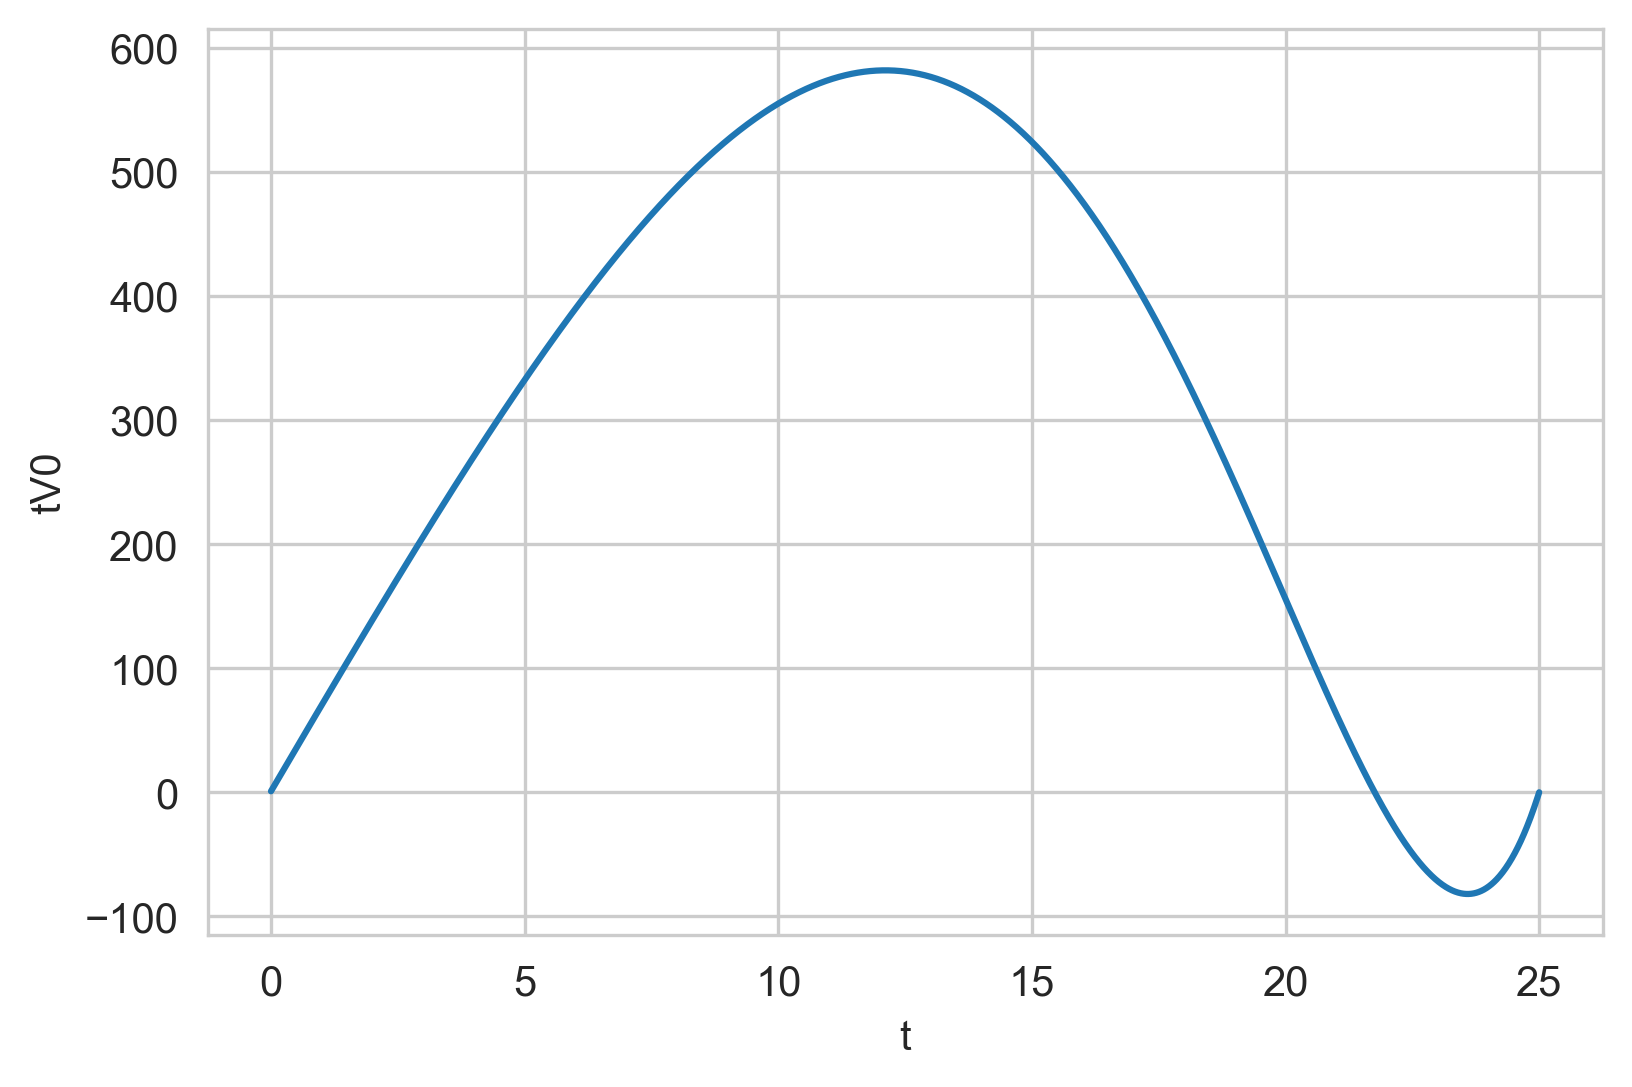

In [18]:
sns.lineplot(data = tV0, x=tV0['t'], y=tV0['tV0'])

Part 2.4.e

In [20]:
Q = (200000*tichphan1[0] + 120000*muy3*tichphan2[0]) / (tichphan2[0] - 1)
Q

170.55499179915063